In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('cleaned_data.csv')
df.head()

,Job Title,Work Type,Average Normalized Salary,AI Impact,Tasks,AI Models,AI Workload Ratio,Domain
0,911 Operator,Full Time,56220.000000,60%,133,1007,0.132075,Construction
1,Academic Advisor,Full Time,51000.000000,15%,905,3602,0.251249,Construction
2,Academic Dean,Full Time,82500.000000,10%,861,3610,0.238504,Sales & Marketing
3,Accessioner,Full Time,38220.000000,60%,46,410,0.112195,Construction
4,Account Executive,Full Time,112091.920876,15%,1162,4586,0.253380,Law Enforcement


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Job Title                  2318 non-null   object 
 1   Work Type                  2318 non-null   object 
 2   Average Normalized Salary  2318 non-null   float64
 3   AI Impact                  2318 non-null   object 
 4   Tasks                      2318 non-null   int64  
 5   AI Models                  2318 non-null   int64  
 6   AI Workload Ratio          2318 non-null   float64
 7   Domain                     2318 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 145.0+ KB


In [4]:
# convert AI Impact to numeric if it's in percentage format
df['AI Impact'] = df['AI Impact'].str.replace('%', '').astype(float)

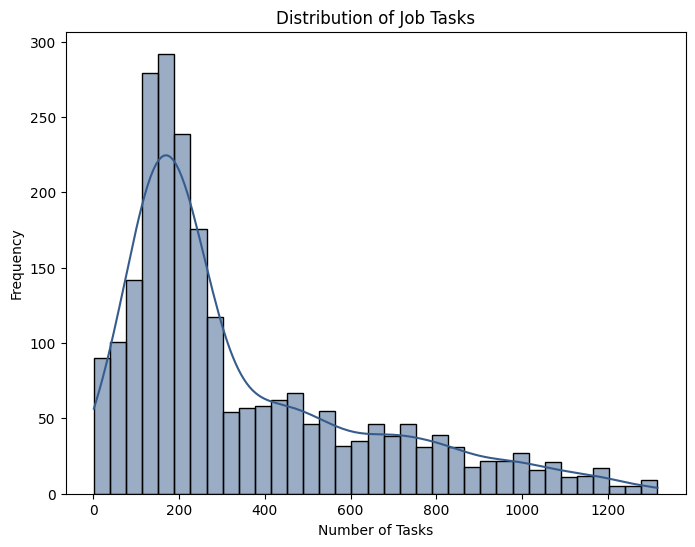

In [113]:
# distribution of Job Tasks
plt.figure(figsize=(8, 6))
sns.histplot(df["Tasks"], kde=True, bins=35, color=sns.color_palette("viridis")[1])
plt.xlabel("Number of Tasks")
plt.ylabel("Frequency")
plt.title("Distribution of Job Tasks")
plt.show()

Tasks represent the number of routine, human performed tasks associated with each job. The distribution of job tasks is heavily right-skewed with a long tail, this indicates that there are very few job titles with an extremely high number of routine tasks.

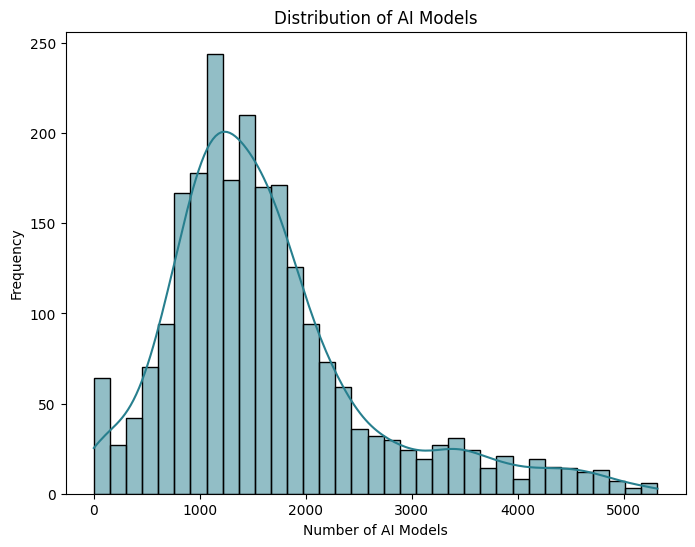

In [112]:
# distribution of AI Models
plt.figure(figsize=(8, 6))
sns.histplot(df["AI Models"], kde=True, bins=35, color=sns.color_palette("viridis")[2])
plt.xlabel("Number of AI Models")
plt.ylabel("Frequency")
plt.title("Distribution of AI Models")
plt.show()

AI models refers to the number of distinct AI models or algorithms that are implemented within a job role. The distribution is somewhat right-skewed, indicating that most jobs have a low to moderate number of integrated AI models, while very few jobs use a large number of AI models. The peak around 1,000 models suggests that this is the most common range, with a gradual decline as the number of models increases.

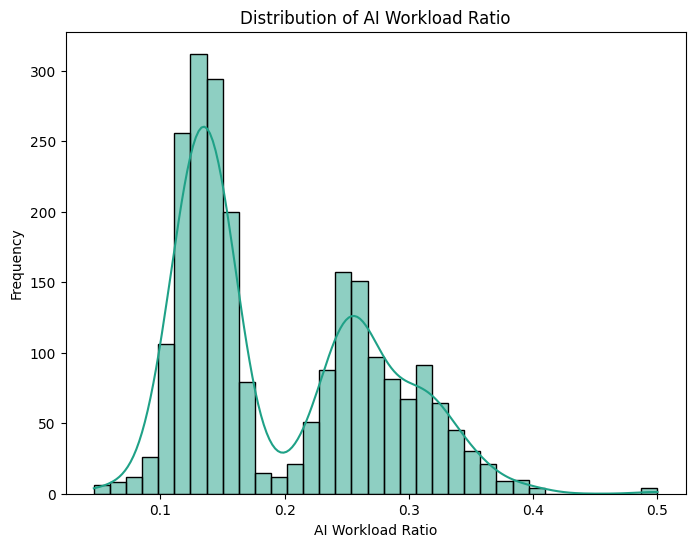

In [ ]:
# distribution of AI Workload Ratio
plt.figure(figsize=(8, 6))
sns.histplot(df["AI Workload Ratio"], kde=True, bins=35, color=sns.color_palette("viridis")[3])
plt.xlabel("AI Workload Ratio")
plt.ylabel("Frequency")
plt.title("Distribution of AI Workload Ratio")
plt.show()

The AI worload ratio represents the proportion of tasks executed by AI compared to those completed by humans. A higher ratio suggests that AI plays a larger role in automating or assisting with job responsibilities, while a lower ratio indicates that the job still relies heavily on human effort. The distribution of AI Workload Ratio appears to be bimodal, with two peaks around 0.1 and 0.3, suggesting that jobs tend to cluster around these two levels rather than being evenly distributed. The right tail indicates that high AI workload ratios are less common.

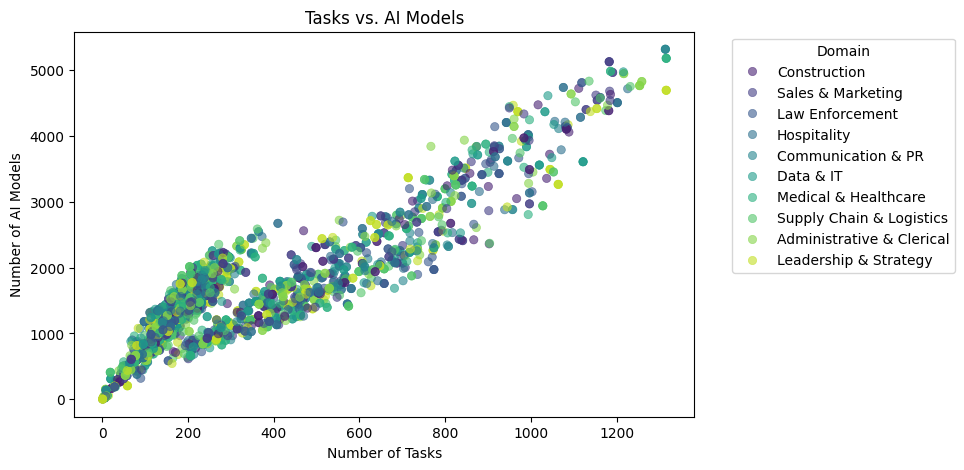

In [109]:
# scatter plot for AI Models vs. Tasks
plt.figure(figsize=(8, 5))  
sns.scatterplot(x=df['Tasks'], y=df['AI Models'], hue=df['Domain'], palette="viridis", alpha=0.6, edgecolor=None)  

plt.xlabel("Number of Tasks")
plt.ylabel("Number of AI Models")
plt.title("Tasks vs. AI Models")
plt.legend(title="Domain", bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.show()


This scatter plot displays a positive correlation between human performed tasks and AI models, suggesting that jobs with more routine and manual tasks are likely to use more AI models.

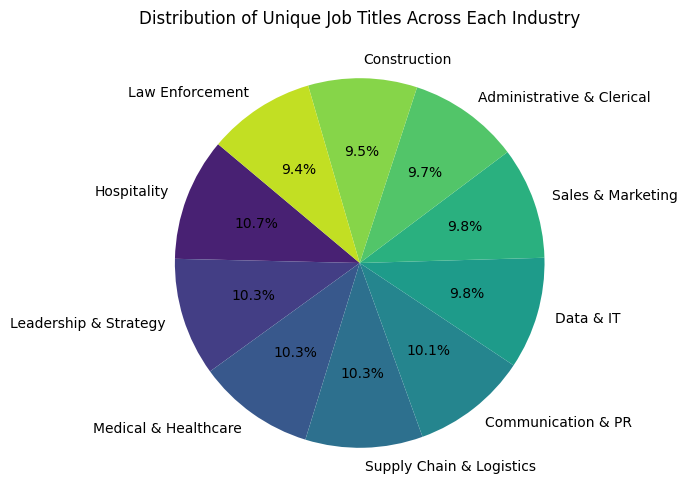

In [74]:
job_counts = df.groupby("Domain")["Job Title"].nunique().sort_values(ascending=False)

colors = sns.color_palette("viridis", len(job_counts))

# pie chart for distribution of unique job titles across each industry
plt.figure(figsize=(8, 6))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Distribution of Unique Job Titles Across Each Industry")
plt.show()

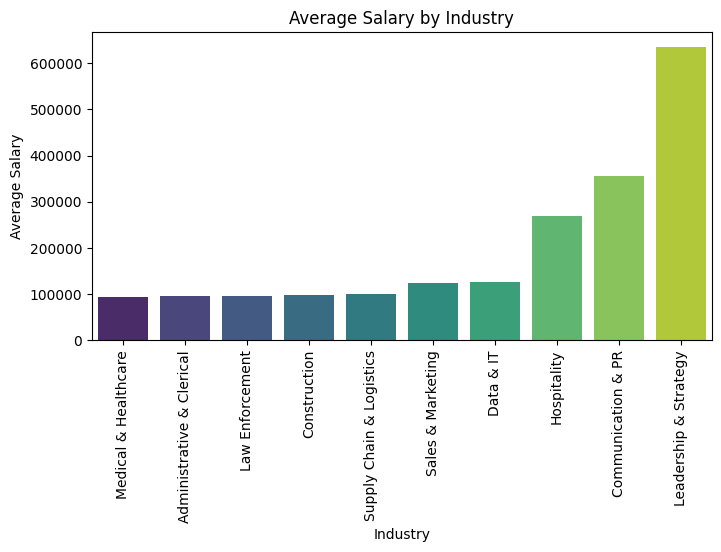

In [91]:
# calculate the average salary for each domain (industry)
salary_by_domain = df.groupby("Domain")["Average Normalized Salary"].mean().sort_values()

# bar graph for average salary by job industry
plt.figure(figsize=(8, 4))
sns.barplot(x=salary_by_domain.index, y=salary_by_domain.values, palette="viridis", hue=salary_by_domain.index)
plt.xlabel("Industry")
plt.ylabel("Average Salary")
plt.title("Average Salary by Industry")
plt.xticks(rotation=90)
plt.show()

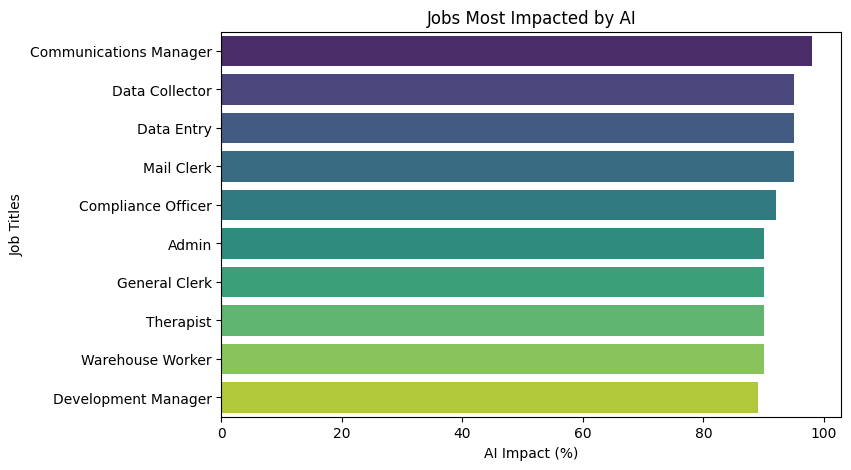

In [98]:
# top 10 jobs with highest AI Impact
top_10_ai_impact = df.drop_duplicates(subset=['Job Title']).nlargest(10, 'AI Impact')[['Job Title', 'AI Impact']]

plt.figure(figsize=(8, 5))
sns.barplot(y=top_10_ai_impact['Job Title'], x=top_10_ai_impact['AI Impact'], palette="viridis", hue=top_10_ai_impact['Job Title'])
plt.xlabel("AI Impact (%)")
plt.ylabel("Job Titles")
plt.title("Jobs Most Impacted by AI")
plt.show()


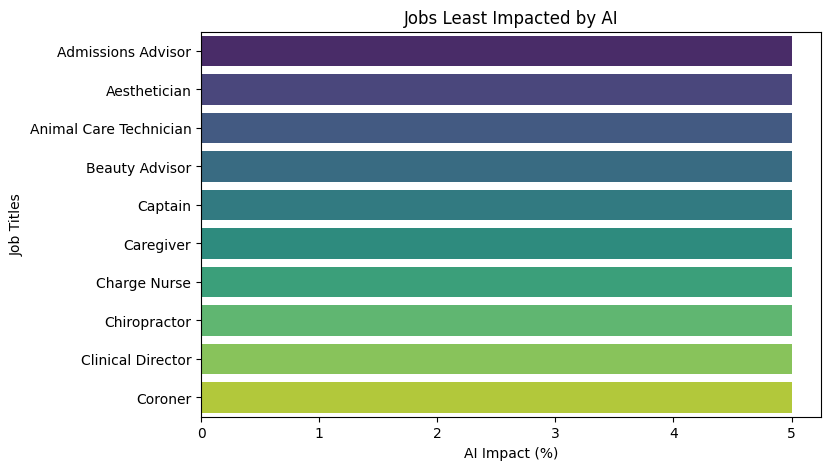

In [99]:
# bottom 10 jobs with lowest AI Impact
bottom_10_ai_impact = df.drop_duplicates(subset=['Job Title']).nsmallest(10, 'AI Impact')[['Job Title', 'AI Impact']]
bottom_colors = sns.color_palette("viridis", len(bottom_10_ai_impact))

plt.figure(figsize=(8, 5))
sns.barplot(y=bottom_10_ai_impact['Job Title'], x=bottom_10_ai_impact['AI Impact'], hue=bottom_10_ai_impact['Job Title'],  palette=bottom_colors, legend=False)
plt.xlabel("AI Impact (%)")
plt.ylabel("Job Titles")
plt.title("Jobs Least Impacted by AI")
plt.show()

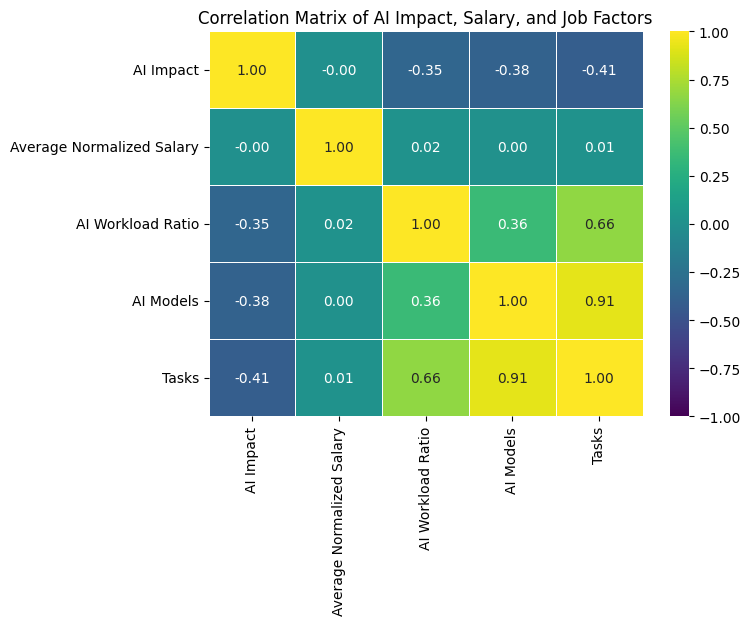

In [120]:
# select only numerical columns for correlation analysis
correlation_cols = ['AI Impact', 'Average Normalized Salary', 'AI Workload Ratio', 'AI Models', 'Tasks']
correlation_matrix = df[correlation_cols].corr()

# correlation matrix heatmap
plt.figure(figsize=(7,5))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix of AI Impact, Salary, and Job Factors")
plt.show()


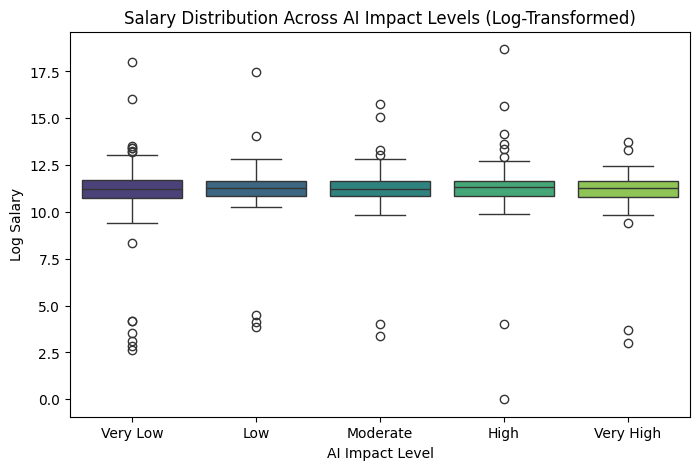

In [140]:
import numpy as np

# boxplot for salary distribution across AI Impact levels
df['AI Impact Level'] = pd.qcut(df['AI Impact'], q=5, labels=["Very Low", "Low", "Moderate", "High", "Very High"])
df['Log Salary'] = np.log1p(df['Average Normalized Salary'])  

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['AI Impact Level'], y=df['Log Salary'], hue=df['AI Impact Level'], palette="viridis", legend=False) 
plt.xlabel("AI Impact Level")
plt.ylabel("Log Salary")
plt.title("Salary Distribution Across AI Impact Levels (Log-Transformed)")
plt.xticks(rotation=0)  
plt.show()

